predicted_class:{} [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
准确率：0.99


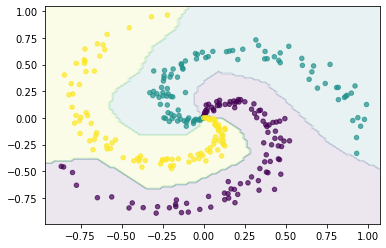

In [7]:
import numpy as np, matplotlib.pyplot as mp

"""创建随机样本"""
def make_moons(n_samples=100, n_features=2, species=3):
    
    # 每个种类class/specy都给100个样本，100 * 3 =》300，每个种类的样本都给2个属性。
    # 样本X得到一个 300 * 2的矩阵
    # 样本对应的初始分类 300 * 1的矩阵
    X = np.zeros((n_samples * species, n_features))
    y = np.zeros(n_samples * species, dtype=int)
    
    for j in range(species):
        ix = range(n_samples * j, n_samples * (j + 1))
        r = np.linspace(0, 1, n_samples)
        t = np.linspace(j * 4, (j + 1) * 4, n_samples) + np.random.randn(n_samples) * .2
        # 初始化矩阵X的值，对应的就是 [r * sin(t),r*cos(t)]
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        # 初始化矩阵y的值，就是0～100是种类1，100～200是种类2，200～300是种类3
        y[ix] = j
    return X, y
X, y = make_moons()
n = X.shape[0]  # 样本数
d = X.shape[1]  # 维数
k = len(np.unique(y))  # 种类数

"""神经网络模型参数"""
# 设置这层中，有多少个处理单元，也就是每个样本要处理的次数
nn = 120  # 神经元个数

# 得到一个 2 * 100 的参数矩阵
W1 = .01 * np.random.randn(d, nn)
b1 = np.zeros((1, nn))

# 初始化一个梯度矩阵 100 * 3 表示每个神经元在三个种类上的变化贡献 
W2 = .01 * np.random.randn(nn, k)
b2 = np.zeros((1, k))

"""梯度下降循环"""
for i in range(2999):
    # 1、ReLU激活（首先通过300 * 2 的X矩阵，与 2* 100 的W1的神经元矩阵 =》 300 * 100的线性处理矩阵，然后通过 ReLu得到一个Relu处理矩阵）
    hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
    
    # 2、得分 （通过结果与梯度矩阵相乘 [300 * 100] X [100 * 3] => [300 * 3]每个样本在三个类别中的分别打分处理）
    scores = np.dot(hidden_layer, W2) + b2
    
    # 3、概率 （通过幂次函数转化，来放大效果，然后算各自的比重,归一化处理）[300 * 3]
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # 4、梯度（[300 * 3]）
    # 获取到(一维度：0~n 
    # 二维：y：[0,0,0....,1,1,1...,2,2,2...]
    # 获取到数据 [0，0],[1,0],[2,0]...[n_samples,1],[n_samples+1,1],[n_samples+2,1]...,[2n_samples,2],[2n_samples+1,2]...
    # 对应的数据，就是正确样本分类上面的值，然后减去-，变成一个负数
    probs[range(n), y] -= 1
    # 把整体切分成N等分
    dscores = probs / n
    
    # 5、反向传播：ReLU 
    # （根据步骤4的delta结果，来确认参数的优化）[ 300 * 3] X [3 * 100] => [300 * 100]
    dhidden = np.dot(dscores, W2.T)
    dhidden[hidden_layer <= 0] = 0
    
    # 6、参数更新：W2、b2 (参数梯度下降)
    W2 -= np.dot(hidden_layer.T, dscores)
    b2 -= np.sum(dscores, axis=0, keepdims=True)
    
    # 7、参数更新：W1、b1
    W1 -= np.dot(X.T, dhidden)
    b1 -= np.sum(dhidden, axis=0, keepdims=True)

"""模型评估"""
hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2

# 获取列维度中，值最大那个index=》（0，1，2）
predicted_class = np.argmax(scores, axis=1)
print("predicted_class:{}",predicted_class)
print('准确率：%.2f' % (np.mean(predicted_class == y)))

"""可视化"""
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
mp.contourf(xx, yy, Z, alpha=.1)  # 填色等位线
mp.scatter(X[:, 0], X[:, 1], c=y, s=20, alpha=.7)
mp.show()